# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

    
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_attr = citipy.nearest_city(lat_lng[0], lat_lng[1])
    country = city_attr.country_code
    city = city_attr.city_name
    
    
    # If the city is unique, then add it to a our cities list and country list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
print(f'cities are of {len(cities)} long')
print(cities)
print(f'countries are of {len(countries)} long')
print(countries)


cities are of 607 long
['rikitea', 'arraial do cabo', 'amderma', 'kavieng', 'torbay', 'marsa matruh', 'teahupoo', 'grand river south east', 'zheleznodorozhnyy', 'georgetown', 'emba', 'ushuaia', 'peniche', 'bredasdorp', 'new norfolk', 'fortuna', 'khatanga', 'bluff', 'busselton', 'carnarvon', 'yellowknife', 'vicksburg', 'pemangkat', 'ancud', 'avarua', 'wattegama', 'ponta do sol', 'tasiilaq', 'ordu', 'ankang', 'castro', 'leningradskiy', 'kapaa', 'atuona', 'mar del plata', 'upernavik', 'putina', 'juba', 'victoria', 'lephepe', 'axim', 'hermanus', 'punta arenas', 'qaanaaq', 'bima', 'whitehorse', 'vaini', 'saint-philippe', 'at-bashi', 'azul', 'luchegorsk', 'pitkyaranta', 'sao felix do xingu', 'mahebourg', 'mataura', 'batie', 'chifeng', 'yarmouth', 'jamestown', 'butaritari', 'mys shmidta', 'vaitupu', 'kamenskoye', 'lorengau', 'mitha tiwana', 'te anau', 'hilo', 'nemuro', 'norman wells', 'makakilo city', 'porto novo', 'gurskoye', 'hede', 'charters towers', 'east london', 'cape town', 'bereda', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name)



In [3]:
settings = {"units":'imperial', "appid": api_key} 
summary = ["main.temp_max", "main.humidity", "wind.speed", "clouds.all", "coord.lat", "coord.lon", "dt"]

In [4]:
# create the data frame to house the data from openweathermapy
#
columns =["Max_Temp", "Humidity", "Wind_Speed", "Cloudiness", "Coord_Lat", 'Coord_Lon']

#data = [response(*summary) for response in weather_data]
weather_df = pd.DataFrame({"City" : cities, "Country" : countries})

weather_df["Max_Temp"]= np.nan
weather_df["Humidity"]= np.nan
weather_df["Wind_Speed"]= np.nan
weather_df["Cloudiness"]= np.nan
weather_df["Coord_Lat"]= np.nan
weather_df["Coord_Lon"]= np.nan
weather_df["dt"]=np.nan


weather_df.head()



,City,Country,Max_Temp,Humidity,Wind_Speed,Cloudiness,Coord_Lat,Coord_Lon,dt
0,rikitea,pf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,arraial do cabo,br,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,amderma,ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kavieng,pg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,torbay,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# use API wrapper to get the current weather info

weather_data=[]
data=[]


for index, row in weather_df.iterrows():
    city = row["City"]
    try:
        weather_data = owm.get_current(city, **settings)
        data = weather_data(*summary)
        print(f'Processing record #{index} - {city}')

        weather_df.loc[index, ['Max_Temp']] = data[0]
        weather_df.loc[index, ['Humidity']] = data[1]
        weather_df.loc[index, ['Wind_Speed']] = data[2]
        weather_df.loc[index, ['Cloudiness']] = data[3]
        weather_df.loc[index, ['Coord_Lat']] = data[4]
        weather_df.loc[index, ['Coord_Lon']] = data[5]
        weather_df.loc[index, ['dt']] = data[6]
    except:
        print(f'Error - skipping record #{index} - {city}')
    time.sleep(1)

# Add a one second interval between queries to stay within API query limits


Processing record #0 - rikitea
Processing record #1 - arraial do cabo
Error - skipping record #2 - amderma
Processing record #3 - kavieng
Processing record #4 - torbay
Processing record #5 - marsa matruh
Processing record #6 - teahupoo
Error - skipping record #7 - grand river south east
Processing record #8 - zheleznodorozhnyy
Processing record #9 - georgetown
Processing record #10 - emba
Processing record #11 - ushuaia
Processing record #12 - peniche
Processing record #13 - bredasdorp
Processing record #14 - new norfolk
Processing record #15 - fortuna
Processing record #16 - khatanga
Processing record #17 - bluff
Processing record #18 - busselton
Processing record #19 - carnarvon
Processing record #20 - yellowknife
Processing record #21 - vicksburg
Error - skipping record #22 - pemangkat
Processing record #23 - ancud
Processing record #24 - avarua
Processing record #25 - wattegama
Processing record #26 - ponta do sol
Processing record #27 - tasiilaq
Processing record #28 - ordu
Proces

Processing record #237 - rumoi
Processing record #238 - puerto ayora
Processing record #239 - alice springs
Processing record #240 - san rafael
Processing record #241 - husavik
Processing record #242 - quelimane
Processing record #243 - hamilton
Processing record #244 - daura
Processing record #245 - scarborough
Processing record #246 - geraldton
Processing record #247 - sao filipe
Processing record #248 - namtsy
Processing record #249 - atar
Processing record #250 - angra dos reis
Processing record #251 - kirakira
Processing record #252 - alofi
Processing record #253 - pangkalanbuun
Processing record #254 - souillac
Processing record #255 - bambous virieux
Processing record #256 - deer lake
Processing record #257 - chandler
Processing record #258 - broken hill
Processing record #259 - starosubkhangulovo
Processing record #260 - evensk
Processing record #261 - pallasovka
Processing record #262 - innisfail
Processing record #263 - havre-saint-pierre
Processing record #264 - itacare
Proc

Processing record #472 - gizo
Processing record #473 - mongo
Processing record #474 - cienfuegos
Processing record #475 - laguna de perlas
Processing record #476 - vila velha
Processing record #477 - kattivakkam
Processing record #478 - najran
Processing record #479 - sola
Processing record #480 - itarema
Processing record #481 - hashtrud
Processing record #482 - kondinskoye
Processing record #483 - patacamaya
Processing record #484 - boa vista
Processing record #485 - lerwick
Error - skipping record #486 - sataua
Processing record #487 - ixtapa
Processing record #488 - port lincoln
Processing record #489 - muisne
Processing record #490 - port hedland
Processing record #491 - mitu
Processing record #492 - chuy
Processing record #493 - khandbari
Processing record #494 - bubaque
Error - skipping record #495 - asau
Processing record #496 - rajmahal
Processing record #497 - nuuk
Error - skipping record #498 - cazaje
Processing record #499 - port blair
Error - skipping record #500 - karaul


In [6]:
print(weather_df)

                       City Country  Max_Temp  Humidity  Wind_Speed  \
0                   rikitea      pf     79.10     100.0        9.86   
1           arraial do cabo      br     80.90      93.0       11.65   
2                   amderma      ru       NaN       NaN         NaN   
3                   kavieng      pg     84.95      97.0        4.27   
4                    torbay      ca     24.01      62.0       16.11   
5              marsa matruh      eg     59.00      58.0        9.17   
6                  teahupoo      pf     87.80      66.0        4.70   
7    grand river south east      mu       NaN       NaN         NaN   
8         zheleznodorozhnyy      ru     18.00      72.0        6.71   
9                georgetown      sh     80.60      78.0        6.93   
10                     emba      kz     59.00      77.0       11.41   
11                  ushuaia      ar     51.80      66.0        3.36   
12                  peniche      pt     53.01      93.0        2.24   
13    

In [7]:
#
# drop those rows with NaN
#
weather_df.dropna(axis=0, how='any', inplace=True)
weather_df.reset_index(drop=True, inplace=True)
print(f'there are {len(weather_df)} in dataframe weather_df')

there are 545 in dataframe weather_df


In [8]:
# output dataframe weather_df to a csv file into directory output_data

weather_df.to_csv(output_data_file)
weather_df.count()

City          545
Country       545
Max_Temp      545
Humidity      545
Wind_Speed    545
Cloudiness    545
Coord_Lat     545
Coord_Lon     545
dt            545
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.


In [9]:
# convert utc date to mmddyy format

#local_time = datetime.fromtimestamp(dt)
dt = weather_df.iloc[0, 8]
today_date = datetime.fromtimestamp(dt).strftime('%m/%d/%y')
color_scheme = {'Blue':'#0c064e'}
print(today_date)

03/02/19


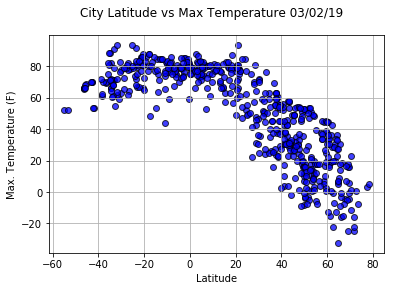

In [17]:
# Create a scatter plot - Latitude vs Max Temperature

plt.suptitle(f"City Latitude vs Max Temperature {today_date}")

# y-axis- temperature
maximum_temp = weather_df["Max_Temp"]

max_temp = weather_df["Max_Temp"].max()

min_temp = weather_df["Max_Temp"].min()

y_min = (int(min_temp/10) - 1 ) * 10
y_max = (int(max_temp/10) + 1 ) * 10

plt.ylim = (y_min, y_max)


# x-axis- latitude

latitude = weather_df["Coord_Lat"]
max_lat = weather_df["Coord_Lat"].max()
min_lat = weather_df["Coord_Lat"].min()

x_min = ((int(min_lat)/20) + 1 ) * 20
x_max = ((int(max_lat)/20) + 1 ) * 20


x_axis = np.arange(min_lat-10, max_lat+10 , 12)

plt.xlim=(x_min, x_max)


plt.scatter(latitude, maximum_temp, color = 'b', edgecolor = 'black', alpha = .75)
              
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")
plt.grid()
plt.savefig("Images/LatitudevsMaxTemperature.png")


plt.show()


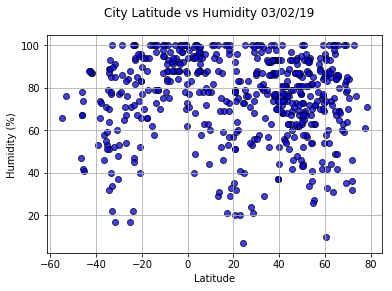

In [14]:
# Create a scatter plot - Latitude vs Humidity

plt.suptitle(f"City Latitude vs Humidity {today_date}")

# y-axis- Humidity
humidity = weather_df["Humidity"]

max_hum = weather_df["Humidity"].max()

min_hum = weather_df["Humidity"].min()

y_min_hum = (int(min_hum/10) - 1 ) * 10
y_max_hum = (int(max_hum/10) + 1 ) * 10

plt.ylim = (y_min_hum, y_max_hum)




plt.scatter(latitude, humidity, color = 'b', edgecolor = 'black', alpha = .75)
              
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("Images/LatitudevsHumidity.png")

plt.show()


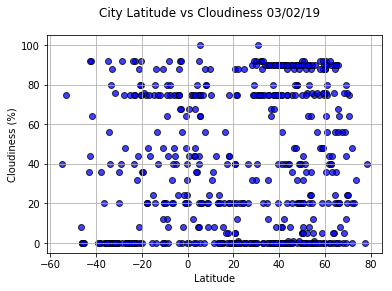

In [15]:
# Create a scatter plot - Latitude vs Cloudiness

plt.suptitle(f"City Latitude vs Cloudiness {today_date}")

# y-axis- Cloudiness
cloudiness = weather_df["Cloudiness"]

max_cloud = weather_df["Cloudiness"].max()

min_cloud = weather_df["Cloudiness"].min()

y_min_cloud = (int(min_cloud/10) - 1 ) * 10
y_max_cloud = (int(max_cloud/10) + 1 ) * 10

plt.ylim = (y_min_cloud, y_max_cloud)



plt.scatter(latitude, cloudiness, color = 'b', edgecolor = 'black', alpha = .75)
              
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/LatitudevsCloudiness.png")

plt.show()


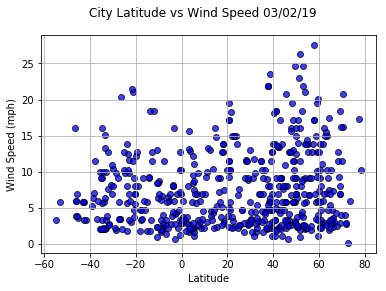

In [16]:
# Create a scatter plot - Latitude vs Wind Speed

plt.suptitle(f"City Latitude vs Wind Speed {today_date}")

# y-axis- Wind Speed
wind = weather_df["Wind_Speed"]

max_wind = weather_df["Wind_Speed"].max()

min_wind = weather_df["Wind_Speed"].min()

y_min_wind = (int(min_wind/10) - 1 ) * 10
y_max_wind = (int(max_wind/10) + 1 ) * 10

plt.ylim = (y_min_wind, y_max_wind)



plt.scatter(latitude, wind, color = 'b', edgecolor = 'black', alpha = .75)
              
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/LatitudevsWindSpeed.png")
plt.show()


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot